<a href="https://colab.research.google.com/github/TheClockworkk/tensor-contraction/blob/master/hw1_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Имеются 5 тензеров: A, B, C, D, E, которые соединены как на рисунке.***
***Задача: осуществить свертку и выполнить ее 3мя способами:***

Cвернуть, используя цикл for;


Вручную используя функции reshape;


Используя пакет ncon;



Сравнить эти способы по:


а) объему написания кода;


б) по времени исполнения;


в) проверить, что эти способы являются равнозначными (сравнения тензеров можно произвести с помощью пакета numpy);


Итогом свертки будет некий тензор R валентности 3.

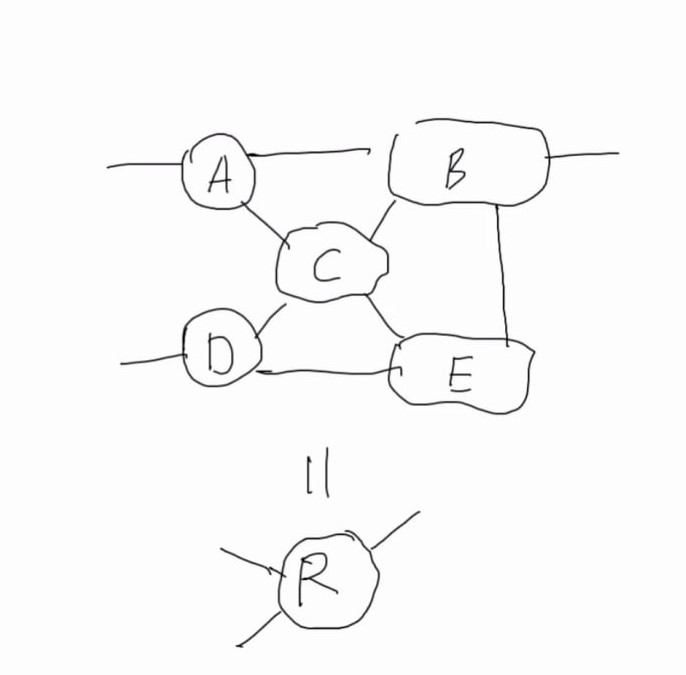

In [100]:
# загружаем ncon и подключаем библиотеки
! pip install  ncon
import numpy as np
from ncon import ncon
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
# объявляем случайные тензоры
x = 4
A = np.random.uniform(-1,1, (x,x,x))
B = np.random.uniform(-1,1, (x,x,x,x))
C = np.random.uniform(-1,1, (x,x,x,x))
D = np.random.uniform(-1,1, (x,x,x))
E = np.random.uniform(-1,1, (x,x,x))

In [102]:
# выводим их
A, B, C, D, E

(array([[[ 0.32628106, -0.12674909,  0.77138732,  0.51330442],
         [-0.19739885,  0.16287857, -0.71277987,  0.27122021],
         [ 0.51960437, -0.27828913, -0.52563717,  0.31024528],
         [-0.54484347, -0.42688431, -0.00439371, -0.94389303]],
 
        [[ 0.72686755, -0.14253433,  0.92537464, -0.28844916],
         [-0.28602453, -0.82511146,  0.04503397, -0.10063134],
         [-0.04255151, -0.02913065, -0.00236867, -0.69225988],
         [ 0.56109313, -0.07247852,  0.53920192,  0.83212061]],
 
        [[-0.64965402,  0.28158482,  0.35807182,  0.01261038],
         [ 0.70802294, -0.7639216 , -0.80280277,  0.48087864],
         [-0.44144079,  0.56103074, -0.76022328, -0.40716177],
         [-0.60606666, -0.15228156, -0.40464539,  0.28043391]],
 
        [[-0.39079428, -0.18941793,  0.47820128,  0.44427585],
         [ 0.3063811 ,  0.86631141, -0.74896722,  0.43791339],
         [-0.13755752,  0.53945845, -0.89215108, -0.91395167],
         [ 0.88708202, -0.64775554,  0.3720937

In [103]:
print(A.shape)
print(B.shape)
print(C.shape)
print(D.shape)
print(E.shape)

(4, 4, 4)
(4, 4, 4, 4)
(4, 4, 4, 4)
(4, 4, 4)
(4, 4, 4)


#1. Свёртка с использованием for.

In [104]:
start1 = time.time()

AC = np.zeros((x, x, x, x, x))
for a in range(x):
  for b in range(x):
    for c in range(x):
      for d in range(x):
        for e in range(x):
          for f in range(x):
            AC[a, b, c, d, e] = AC[a, b, c, d, e] + A[a, b, f] * C[f, c, d, e]
ACB = np.zeros((x, x, x, x, x))
for a in range(x):
  for b in range(x):
    for c in range(x):
      for d in range(x):
        for e in range(x):
          for f in range(x):
            for g in range(x):
              ACB[a, b, c, d, e] = ACB[a, b, c, d, e] + AC[a, f, g, b, c] * B[f, g, e, d]

ACBE = np.zeros((x, x, x, x))
for a in range(x):
  for b in range(x):
    for c in range(x):
      for d in range(x):
        for e in range(x):
          for f in range(x):
            ACBE[a, b, c, d] = ACBE[a, b, c, d] + ACB[a, b, e, c, f] * E[f, e, d]

ACBED  = np.zeros((x, x, x))
for a in range(x):
  for b in range(x):
    for c in range(x):
      for d in range(x):
        for e in range(x):
          ACBED[a, b, c] =  ACBED[a, b, c] + ACBE[a, d, b, e] + D[e, d, c]

end1 = time.time() - start1

In [105]:
answer_for = ACBED
print(ACBED)
print(ACBED.shape)

[[[ -2.98648198   1.57849835   0.50953016   1.31769778]
  [  0.67447002   5.23945035   4.17048215   4.97864977]
  [  3.30742462   7.87240496   6.80343676   7.61160438]
  [-11.15411472  -6.58913439  -7.65810258  -6.84993496]]

 [[  6.67072053  11.23570086  10.16673266  10.97490028]
  [-10.95219043  -6.3872101   -7.4561783   -6.64801067]
  [  0.58473394   5.14971427   4.08074607   4.8889137 ]
  [-16.30785578 -11.74287544 -12.81184364 -12.00367602]]

 [[  7.10505426  11.67003459  10.60106639  11.40923401]
  [  2.65829347   7.2232738    6.1543056    6.96247322]
  [  1.05993877   5.62491911   4.55595091   5.36411853]
  [ -2.20178688   2.36319345   1.29422525   2.10239287]]

 [[ 19.97380727  24.53878761  23.46981941  24.27798703]
  [ 10.16865829  14.73363863  13.66467043  14.47283805]
  [ -4.50928728   0.05569305  -1.01327514  -0.20510752]
  [-14.70421374 -10.1392334  -11.2082016  -10.40003398]]]
(4, 4, 4)


#2. Свёртка с использованием reshape.

In [106]:
start2 = time.time()

# np.tensordot вычисляет скалярное произведение тензора вдоль заданных осей.
# на вход подаются два тензора a и b, и объект array_like, сожержащий оси в числовом формате.
AC = np.tensordot(A, C, axes=([2],[0]))
ACB = np.tensordot(AC, B, axes=([1,2],[0,1]))
ACBE = np.tensordot(ACB, E, axes=([2,3],[1,0]))
ACBED = np.tensordot(ACBE, D, axes=([1,2],[1,2]))

end2 = time.time() - start2

In [107]:
answer_reshape = ACBED
print(ACBED)
print(ACBED.shape)

[[[  3.81640481  -6.52911511  -2.32931982   5.0101622 ]
  [  2.61148014  -2.09542114   0.54381491   6.64439715]
  [  4.80574084   4.00412244  -3.93176908   1.65997893]
  [ -3.1647209   -2.3630837   -0.12377109   3.03488322]]

 [[-13.09869868  -2.04997621  13.70810532  -2.5803589 ]
  [ -9.86325729  -5.53854846   3.32035012   3.08050019]
  [  4.70449817   0.47490318   0.52040871  -1.37656654]
  [ 12.68582525  14.49638997   3.7492921   -4.27563042]]

 [[ -4.17051857 -14.32060573   2.0497965    5.67193442]
  [ -2.45529028  -1.43281334  -0.20686874   2.13004502]
  [ 15.62484954  -4.73456641  -4.84584967   0.50519343]
  [ -8.99056173  -9.6381627    1.92354436  -0.33442639]]

 [[ -3.92220971 -15.74251871  -3.09202246  -0.70178261]
  [ -8.53044356  -9.35417801  -3.50513893   6.27119498]
  [  1.4080009    3.04987398   3.08201314 -10.71410415]
  [  8.16316272  17.85157422  -5.21181636  10.20666592]]]
(4, 4, 4)


#3. Свёртка с использованием ncon.

In [138]:
start3 = time.time()

# первый аргумент L - лист тензоров, второй аргумент v — это список из списка, по одному для каждого тензора в L. 
# каждый v[i]состоит из целых чисел, каждое из которых обозначает индекс L[i].
ABCDE = ncon((A, B, C, D, E),  ([1, 4, -1], [1, 3, 5, -2], [4, 5, 6, 7], [2, 7, -3], [2, 3, 6]))

end3 = time.time() - start3

In [139]:
answer_ncon = ABCDE
print(ACBED)
print(ACBED.shape)

[[[  3.81640481  -6.52911511  -2.32931982   5.0101622 ]
  [  2.61148014  -2.09542114   0.54381491   6.64439715]
  [  4.80574084   4.00412244  -3.93176908   1.65997893]
  [ -3.1647209   -2.3630837   -0.12377109   3.03488322]]

 [[-13.09869868  -2.04997621  13.70810532  -2.5803589 ]
  [ -9.86325729  -5.53854846   3.32035012   3.08050019]
  [  4.70449817   0.47490318   0.52040871  -1.37656654]
  [ 12.68582525  14.49638997   3.7492921   -4.27563042]]

 [[ -4.17051857 -14.32060573   2.0497965    5.67193442]
  [ -2.45529028  -1.43281334  -0.20686874   2.13004502]
  [ 15.62484954  -4.73456641  -4.84584967   0.50519343]
  [ -8.99056173  -9.6381627    1.92354436  -0.33442639]]

 [[ -3.92220971 -15.74251871  -3.09202246  -0.70178261]
  [ -8.53044356  -9.35417801  -3.50513893   6.27119498]
  [  1.4080009    3.04987398   3.08201314 -10.71410415]
  [  8.16316272  17.85157422  -5.21181636  10.20666592]]]
(4, 4, 4)


#4. Итоги.

In [110]:
print(f"Время выполнения через for: {end1}")
print(f"Время выполнения через reshape и матричное произведение (reshape): = {end2}")
print(f"Время выполнения через ncon = {end3}")

Время выполнения через for: 0.03382682800292969
Время выполнения через reshape и матричное произведение (reshape): = 0.0009360313415527344
Время выполнения через ncon = 0.002602100372314453


По объему кода самый затратный - for, затем reshape и ncon;

По времени выполнения самый затратный for, затем ncon и reshape.